# Tutoriel d'exemple de résolution d'un problème de machine learning à l'aide des SVM



## Problème à résoudre

Notre travail va consister à créer un algorithme qui identifie le chiffre inscrit à la main sur une image. Il s'agit donc d'un algorithme de **classification**, qui va assigner chaque image à une catégorie correspondant à un chiffre de 0 à 9.

![Chiffres manuscrits](https://assets.digitalocean.com/articles/handwriting_tensorflow_python3/wBCHXId.png)



## Techniques et outils utilisés

Pour résoudre ce problème, nous allons utiliser un modèle de **SVM** (Support Vector Machines) en **apprentissage supervisé**. Voici un aperçu de ces concepts :
- L'apprentissage supervisé est une technique qui consiste à entraîner un modèle de prédiction en lui donnant un set de données. Dans notre cas, nous allons utiliser nos données pour apprendre à notre modèle à classer chaque image dans une catégorie qui correspond au chiffre écrit sur l'image.
- Les SVM sont un ensemble de techniques qui visent à classer des données représentées dans un espace vectoriel (i.e. dans un espace qui peut comporter un nombre de dimensions très élevé).

Nous allons utiliser la librairie scikit-learn pour réaliser ce projet.

## Code

### Importation des librairies

In [1]:
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

### Importation du dataset

Commençons par importer et explorer nos données :

In [2]:
digits = datasets.load_digits()
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

On voit grâce à la description détaillée qu'il s'agit d'un dataset qui cherche à faire de la reconnaissance optique de chiffres écrits à la main (grâce au titre), puis qu'il contient 1797 exemples de chiffres, avec 64 attributes par chiffre. 

Il se trouve que l'on comprend ensuite que ces attributes sont directement le nombre de pixels que contient chacune des 1797 images disponibles, chacune représentant un nombre entre 0 et 9 (c'est la partie attribute information qui nous renseigne là-dessus). Nous sommes donc en possession de 1797 images de 8x8 pixels qui représentent des chiffres de 0 à 9.

Pour s'en assurer nous représentons quelques-uns de ces chiffres :

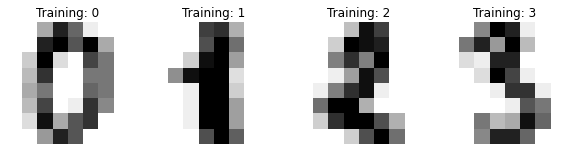

In [3]:
# On affiche quelques exemples du dataset pour voir à quoi ils ressemblent :
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)

### Phase d'apprentissage du modèle

La première étape lors de l'utilisation d'une méthode d'apprentissage supervisée, c'est l'apprentissage. Dans cette étape, nous allons construire notre modèle en lui donnant un certain nombre d'exemples depuis notre base de données. La règle de base lors de cette étape est de séparer la base de données en deux : une partie pour l'apprentissage et une partie pour le test. Ceci afin de ne pas montrer lors de la phase de test des exemples de chiffres qui auraient servis lors de la phase d'apprentissage, car alors le test serait biaisé.

Cependant, il y a une subtilité dans notre cas précis : pour pouvoir apprendre, un modèle a besoin de **features**, autrement dit de nombres, en entrée. En effet un ordinateur ne comprend que les nombres, et il serait bien incapable de travailler avec une image !

En traitement d'images, la solution la plus simple pour produire ces features consiste à vectoriser l'image, c'est-à-dire passer l'image 8x8 sous forme d'un vecteur de taille 64, dont chaque ligne représente la valeur d'un pixel en niveau de gris. C'est ce que nous faisons juste en-dessous :

In [4]:
# On vectorise toutes les images pour transformer les "matrices" 
# qui représentent les images en vecteurs colonnes
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# POn affiche les données après vectorisation pour bien comprendre avec quoi on travaille
print("Taille avant vectorisation : {}\nTaille après vectorisation : {}".format(digits.images.shape, data.shape))

Taille avant vectorisation : (1797, 8, 8)
Taille après vectorisation : (1797, 64)


Puis, nous divisons notre jeu de données d'entrée en deux sous-ensembles, afin de constituer nos jeux de données d'apprentissage (constitué ici de 70 % des données de départ), et de test (30 % des données de départ).

In [5]:
# On divise les données en deux sets (70 % pour l'entraînement, 30% pour le test)
x_train, x_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.3, shuffle=False
)

Puis nous mettons en place notre modèle, l'entraînons et visualisons les résultats de l'entraînement :

In [6]:
C = 1.0  # Paramètre de régularisation du SVM
# Ici, on crée un SVM linéaire, soit le type de SVM le plus simple qui existe
model = svm.LinearSVC(C=C, max_iter=1000000)

# Entraînement du modèle
model = model.fit(x_train, y_train)


y_pred = model.predict(x_test)

Nous pouvons aussi regarder quelques résultats de prédiction pour voir si le modèle semble fonctionner :

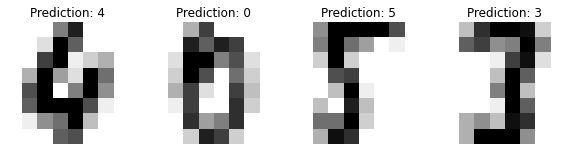

In [7]:
# Affichage de plusieurs prédictions
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, x_test, y_pred):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Prediction: {prediction}")

Tout semble bien fonctionner, mais il est important de faire d'autres manipulations pour être certain que le modèle est efficace.

### Vérification des résultats pour valider le modèle

Une étape essentielle après l'apprentissage et le test d'un modèle de machine learning est l'analyse de ses performances afin de valider s'il fonctionne ou non. Pour ce faire, nous utilisons différentes métriques, dont nous vous invitons à aller chercher les définitions en ligne : la précision, le recall, et le f1-score.
Ces métriques doivent toutes tendre vers 1 lorsque le modèle fonctionne bien.

In [8]:
# On affiche les données de précision en utilisant le set de test
print(
    f"Classification report for classifier {model}:\n"
    f"{classification_report(y_test, y_pred)}\n"
)

Classification report for classifier LinearSVC(max_iter=1000000):
              precision    recall  f1-score   support

           0       0.91      0.96      0.94        53
           1       0.72      0.83      0.77        53
           2       0.92      0.89      0.90        53
           3       0.93      0.79      0.86        53
           4       0.96      0.88      0.92        57
           5       0.98      0.93      0.95        56
           6       0.93      0.98      0.95        54
           7       0.94      0.87      0.90        54
           8       0.77      0.85      0.81        52
           9       0.83      0.87      0.85        55

    accuracy                           0.89       540
   macro avg       0.89      0.88      0.89       540
weighted avg       0.89      0.89      0.89       540




On constate que les résultats sont globalement corrects, mais que les classes 1 et 8, par exemple, souffrent de quelques difficultés à être correctement classifiée.

Il est intéressant de voir que le nombre d'images testées par classe est à peu près égal, ce qui assure une bonne représentativité de chaque classe dans les résultats (on parle de problème équilibré). Il est important de s'assurer de cet équilibre dès la phase d'apprentissage pour être certain de ne pas biaiser l'apprentissage de certaines classes (une classe sous-représentée pourrait être très peu prédite en pratique). On retrouve bien ici que 540 images en test représentent eniron 30 % de 1764 images du jeu de données complet, ce qui est cohérent.

Pour analyser plus finement les résultats, on représente enuite la matrice de confusion, qui montre pour chaque classe le nombre de bonnes et mauvaises classification, et ce de manière croisée pour savoir dans quelles classes ont été prédites les erreurs de classification :

Confusion matrix:
[[51  0  0  0  1  0  1  0  0  0]
 [ 0 44  1  2  0  0  0  0  2  4]
 [ 3  0 47  0  0  0  0  0  0  3]
 [ 0  1  0 42  0  1  0  2  7  0]
 [ 1  3  0  0 50  0  2  0  0  1]
 [ 0  2  1  0  0 52  1  0  0  0]
 [ 0  0  1  0  0  0 53  0  0  0]
 [ 0  1  0  0  0  0  0 47  4  2]
 [ 0  6  1  0  1  0  0  0 44  0]
 [ 1  4  0  1  0  0  0  1  0 48]]


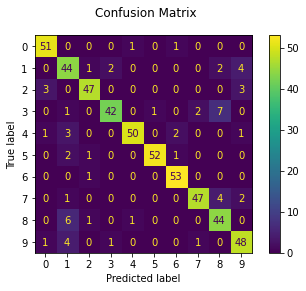

In [9]:
# Affichage de la matrice de confusion
disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

On remarque alors que les erreurs observés au global pour la classe 3 se concentrent dans la classe 8, et que celles observées pour la classe 8 se concentrent quant à elles dans la classe 1. Une analyse plus approfondie peut alors être menée pour déterminer pourquoi ces erreurs se font spécifiquement sur ces classes-là.

## Conclusion

Ce tutoriel est maintenant terminé ! Pour aller plus loin, vous pouvez si vous le souhaitez expérimenter avec les modèles de SVM plus complexes proposés par scikit-learn ou jouer avec les paramètres pour mieux comprendre comment ils influencent le modèle.